In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# Check the minimum and maximum pixel values
print(f"Training Data - Min Pixel Value: {X_train.min()}, Max Pixel Value: {X_train.max()}")
print(f"Test Data - Min Pixel Value: {X_test.min()}, Max Pixel Value: {X_test.max()}")

Training Data - Min Pixel Value: 0, Max Pixel Value: 255
Test Data - Min Pixel Value: 0, Max Pixel Value: 255


In [5]:
# Normalize pixel values (0-255) to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten 28x28 images into vectors of size 784
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Model Building

In [6]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8559 - loss: 0.4848 - val_accuracy: 0.9584 - val_loss: 0.1433
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9646 - loss: 0.1171 - val_accuracy: 0.9674 - val_loss: 0.1050
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9761 - loss: 0.0785 - val_accuracy: 0.9714 - val_loss: 0.1000
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9837 - loss: 0.0528 - val_accuracy: 0.9697 - val_loss: 0.1031
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9865 - loss: 0.0427 - val_accuracy: 0.9728 - val_loss: 0.0937
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9913 - loss: 0.0299 - val_accuracy: 0.9724 - val_loss: 0.0993
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9724 - val_loss: 0.1051
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9929 - loss: 0.022

## Evaluate Model

In [8]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

Test Accuracy: 0.98
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [29]:
# y_pred

## Confusion Matrix and Classification Report

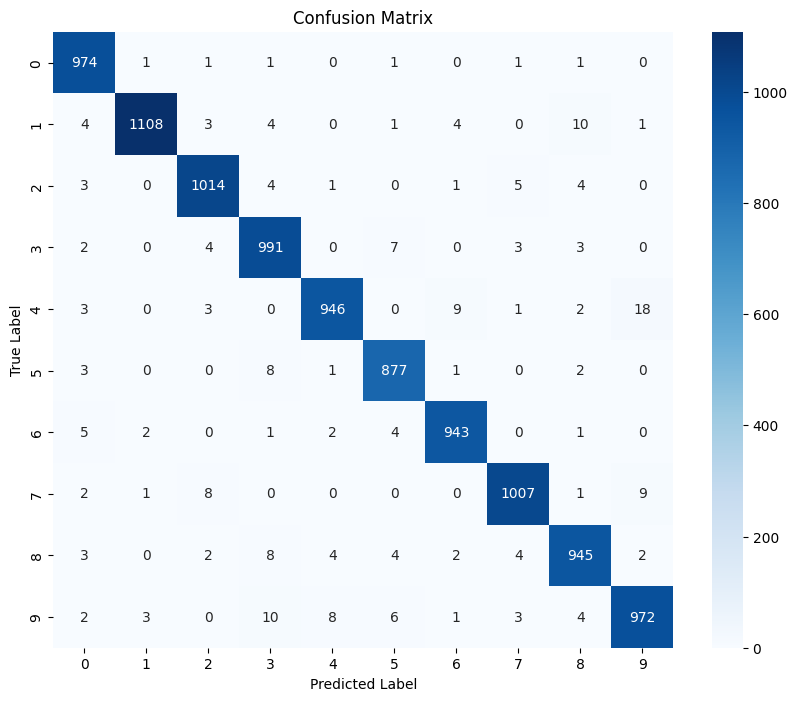

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [10]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


## Visualize Training History

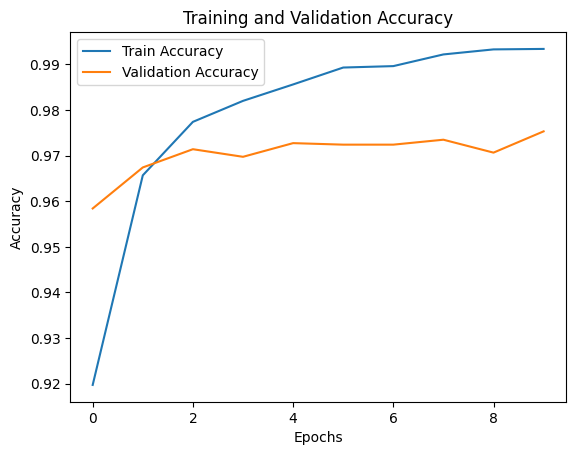

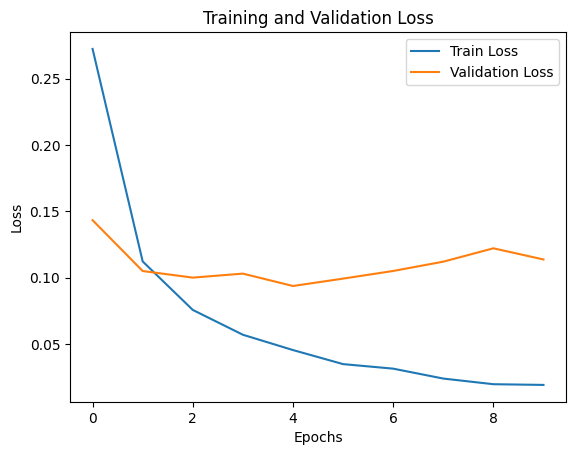

In [9]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Prediction

In [21]:
def predict_digit(image, model):
    """
    Predict the digit for a given input image.

    Parameters:
    image (numpy array): A single 28x28 grayscale image of a digit.

    Returns:
    int: The predicted digit (0-9).
    """
    # Check if the image has the correct shape
    if image.shape != (28, 28):
        raise ValueError("Input image must have shape (28, 28).")

    # Normalize the image (0-255 to 0-1)
    image = image / 255.0

    # Flatten the image to a vector of size 784
    image = image.reshape(1, 784)  # Add batch dimension

    # Predict the digit
    prediction = model.predict(image)
    predicted_digit = np.argmax(prediction)

    return predicted_digit

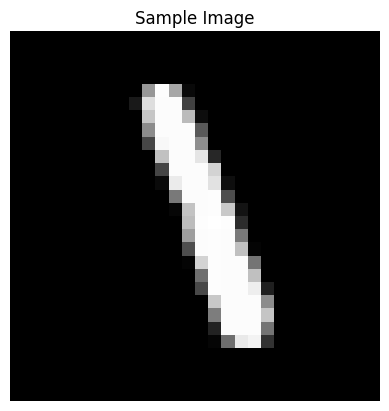

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Digit: 5


In [27]:
# Example: Use the first image from the test dataset
sample_image = X_test[46].reshape(28, 28)  # Reshape it back to 28x28 for visualization

# Visualize the image
plt.imshow(sample_image,cmap='gray')
plt.title("Sample Image")
plt.axis('off')
plt.show()

# Predict the digit
predicted_digit = predict_digit(sample_image, model)
print(f"Predicted Digit: {predicted_digit}")